In [1]:
#Loan Eligibility Prediction Task:
#Load the dataset and explore it to understand the structure, features, and target variable (Loan Status: Approved/Not Approved).
#Loan Eligibility Prediction will provide you with comprehensive and detailed knowledge of Data Science concepts with a hands-on project where you will learn to develop a Loan Eligibility Prediction model using Python. In the process you will learn popular Machine Learning Algorithms and explore numerous Python Libraries.


#Importing all the required libraries

In [2]:
import matplotlib.pyplot as plt                                                 #for visualization
import numpy as np                                                              #for arrays
import pandas as pd                                                             #for dataframe
from sklearn.linear_model import LogisticRegression                             #for logistic regression model
from sklearn.linear_model import LinearRegression                               #for linear regression model
from sklearn.metrics import classification_report, confusion_matrix             #for getting report and confusion matrix
from google.colab import files                                                  #for uploading files to colab
import io                                                                       #for uploading files to colab
#from sklearn import preprocessing                                               #for normalization if needed

#Uploading the dataset and storing it in the dataframe

In [3]:
uploaded = files.upload()

Saving Loan prediction dataset.csv to Loan prediction dataset.csv


In [4]:
dataset = pd.read_csv(io.BytesIO(uploaded['Loan prediction dataset.csv']))
print(dataset)

    Age   Income Employee Credit_Rating Buys_Loan
0    28  2400000       no          fair        no
1    27  2600000       no     excellent        no
2    38  2800000       no          fair       yes
3    49  1600000       no          fair       yes
4    48   800000      yes          fair       yes
5    49   900000      yes     excellent        no
6    36   600000      yes     excellent       yes
7    26  1800000       no          fair        no
8    24   700000      yes          fair       yes
9    51  1400000      yes          fair       yes
10   26  1600000      yes     excellent       yes
11   39  1700000       no     excellent       yes
12   40  3200000      yes          fair       yes
13   50  1600000       no     excellent        no


#Data Preprocessing

Age, Income, Employee, Credit_Rating are the Independent variables</br>
Buys_Loan is the dependent variable</br>
Age, Income are Continuous variables and Employee, Credit_Rating, Buys_Loan are Categorical variables</br>
Employee Status: Yes --> 1; No --> 0</br>
Credit_Rating:   Fair -->0; Excellent -->1</br>
Buys_Loan:      Yes --> 1; No --> 0

In [5]:
dataset['Employee'] = dataset['Employee'].replace(['no','yes'],[0,1])
dataset['Buys_Loan'] = dataset['Buys_Loan'].replace(['no','yes'],[0,1])
dataset['Credit_Rating'] = dataset['Credit_Rating'].replace(['fair','excellent'],[0,1])
print(dataset)

    Age   Income  Employee  Credit_Rating  Buys_Loan
0    28  2400000         0              0          0
1    27  2600000         0              1          0
2    38  2800000         0              0          1
3    49  1600000         0              0          1
4    48   800000         1              0          1
5    49   900000         1              1          0
6    36   600000         1              1          1
7    26  1800000         0              0          0
8    24   700000         1              0          1
9    51  1400000         1              0          1
10   26  1600000         1              1          1
11   39  1700000         0              1          1
12   40  3200000         1              0          1
13   50  1600000         0              1          0


<ipython-input-5-dee443fa0b67>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Employee'] = dataset['Employee'].replace(['no','yes'],[0,1])
<ipython-input-5-dee443fa0b67>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Buys_Loan'] = dataset['Buys_Loan'].replace(['no','yes'],[0,1])
<ipython-input-5-dee443fa0b67>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            14 non-null     int64
 1   Income         14 non-null     int64
 2   Employee       14 non-null     int64
 3   Credit_Rating  14 non-null     int64
 4   Buys_Loan      14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [7]:
dataset['Buys_Loan']=pd.Categorical(dataset.Buys_Loan)
dataset['Employee']=pd.Categorical(dataset.Employee)
dataset['Credit_Rating']=pd.Categorical(dataset.Credit_Rating)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            14 non-null     int64   
 1   Income         14 non-null     int64   
 2   Employee       14 non-null     category
 3   Credit_Rating  14 non-null     category
 4   Buys_Loan      14 non-null     category
dtypes: category(3), int64(2)
memory usage: 766.0 bytes


In [9]:
dataset.describe()

,Age,Income
count,14.000000,1.400000e+01
mean,37.928571,1.692857e+06
std,10.261686,8.109484e+05
min,24.000000,6.000000e+05
25%,27.250000,1.025000e+06
50%,38.500000,1.600000e+06
75%,48.750000,2.250000e+06
max,51.000000,3.200000e+06


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

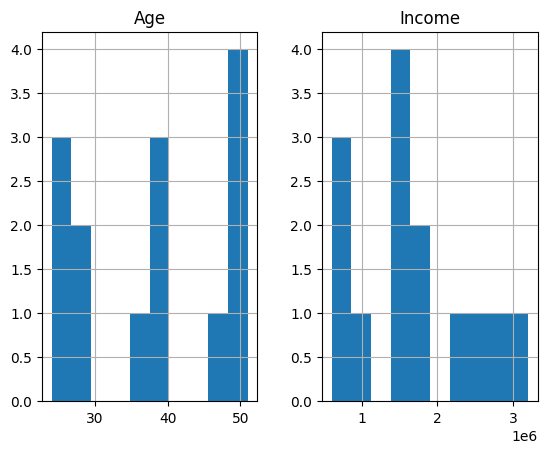

In [10]:
dataset.hist()

#Independent & Dependent Variables

In [11]:
x=dataset.iloc[:,:4].values
y=dataset.iloc[:,4:5].values

In [12]:
x

array([[     28, 2400000,       0,       0],
       [     27, 2600000,       0,       1],
       [     38, 2800000,       0,       0],
       [     49, 1600000,       0,       0],
       [     48,  800000,       1,       0],
       [     49,  900000,       1,       1],
       [     36,  600000,       1,       1],
       [     26, 1800000,       0,       0],
       [     24,  700000,       1,       0],
       [     51, 1400000,       1,       0],
       [     26, 1600000,       1,       1],
       [     39, 1700000,       0,       1],
       [     40, 3200000,       1,       0],
       [     50, 1600000,       0,       1]])

In [13]:
y

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

#Linear Regression Model

In [14]:
lr_model=LinearRegression().fit(x,y)
print("Slopes/Coefficients:",lr_model.coef_)
print("Intercept:",lr_model.intercept_)

Slopes/Coefficients: [[ 4.49399253e-03  1.30374642e-08  4.27528670e-01 -2.44850857e-01]]
Intercept: [0.34150761]


##Actual vs Predicted

In [15]:
lr_predict=np.append(y,lr_model.predict(x),axis=1)
print(lr_predict)
#print("Predicted value:\n",lr_model.predict(x),'\n\nActual value:\n',y)

[[0.         0.49862931]
 [0.         0.25189196]
 [1.         0.54878422]
 [1.         0.58257319]
 [1.         0.99517789]
 [0.         0.75612477]
 [1.         0.69379163]
 [0.         0.48181885]
 [1.         0.88601832]
 [1.         1.01648235]
 [1.         0.66188917]
 [1.         0.29408615]
 [1.         0.99051586]
 [0.         0.34221632]]


##Evaluation

In [16]:
print("R^2 value:",lr_model.score(x,y))

R^2 value: 0.27489917793392693


This model shows low level of correlation. So going with Logistic regression

#Logistic Regression

##Model 1

In [17]:
log_model1=LogisticRegression().fit(x,y)
print("Coefficients:",log_model1.coef_)
print("Intercept:",log_model1.intercept_)

Coefficients: [[ 2.38152204e-02 -2.45872492e-07  7.40773069e-01 -5.41562381e-01]]
Intercept: [0.01938718]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###Probability of prediction

In [18]:
log_model1.predict_proba(x)

array([[0.47598864, 0.52401136],
       [0.62678121, 0.37321879],
       [0.44129141, 0.55870859],
       [0.31153839, 0.68846161],
       [0.15360616, 0.84639384],
       [0.23789437, 0.76210563],
       [0.2832449 , 0.7167551 ],
       [0.45115319, 0.54884681],
       [0.23873729, 0.76126271],
       [0.16375982, 0.83624018],
       [0.39069361, 0.60930639],
       [0.50284118, 0.49715882],
       [0.28374159, 0.71625841],
       [0.43163344, 0.56836656]])

###Actual vs Predicted

In [19]:
log_pred_y=np.reshape(log_model1.predict(x),(len(y),1))
log_model1_predict=np.append(y,log_pred_y,axis=1)
print(log_model1_predict)

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]]


###Evaluating Loigistic Regression Model1

In [20]:
print("R^2 value:",log_model1.score(x,y))

R^2 value: 0.6428571428571429


####Confusion Matrix

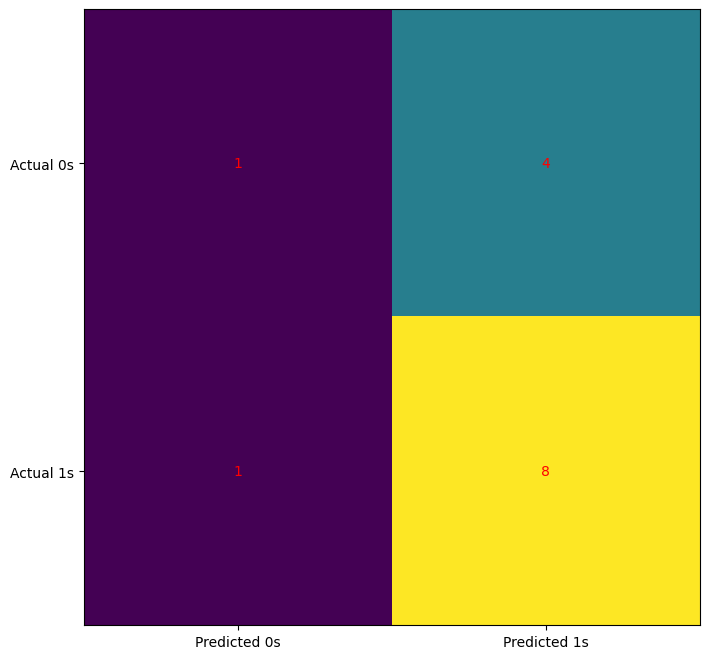

In [21]:
cm = confusion_matrix(y, log_model1.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


####Classification Report

In [22]:
print(classification_report(y, log_model1.predict(x)))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.67      0.89      0.76         9

    accuracy                           0.64        14
   macro avg       0.58      0.54      0.52        14
weighted avg       0.61      0.64      0.59        14



###Note: </br>0.64 or 64% Accuracy is a fair. Let us try the same with different solver to increase the score.

##Model 2

In [24]:
log_model2 = LogisticRegression(solver='newton-cg', multi_class='multinomial', random_state=0, fit_intercept=True, dual=False, penalty=None).fit(x,y) # Changed 'none' to None
print("Coefficients:", log_model2.coef_)
print("Intercept:", log_model2.intercept_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Coefficients: [[ 1.86478755e-02  1.47562403e-07  1.28228298e+00 -7.19639712e-01]]
Intercept: [-0.84684151]


###Probability of Prediction

In [25]:
log_model2.predict_proba(x)

array([[0.48527987, 0.51472013],
       [0.79554063, 0.20445937],
       [0.36588646, 0.63411354],
       [0.35297026, 0.64702974],
       [0.0522932 , 0.9477068 ],
       [0.17876934, 0.82123066],
       [0.27861834, 0.72138166],
       [0.54804353, 0.45195647],
       [0.12211329, 0.87788671],
       [0.03969061, 0.96030939],
       [0.29452806, 0.70547194],
       [0.76435682, 0.23564318],
       [0.035328  , 0.964672  ],
       [0.68911288, 0.31088712]])

###Actual vs Predicted

In [26]:
log_pred_y2=np.reshape(log_model2.predict(x),(len(y),1))
log_model2_predict=np.append(y,log_pred_y2,axis=1)
print(log_model2_predict)

[[0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]]


###Evaluating Logistic Regression Model2

In [27]:
print("R^2 value:",log_model2.score(x,y))

R^2 value: 0.7857142857142857


####Confusion Matrix

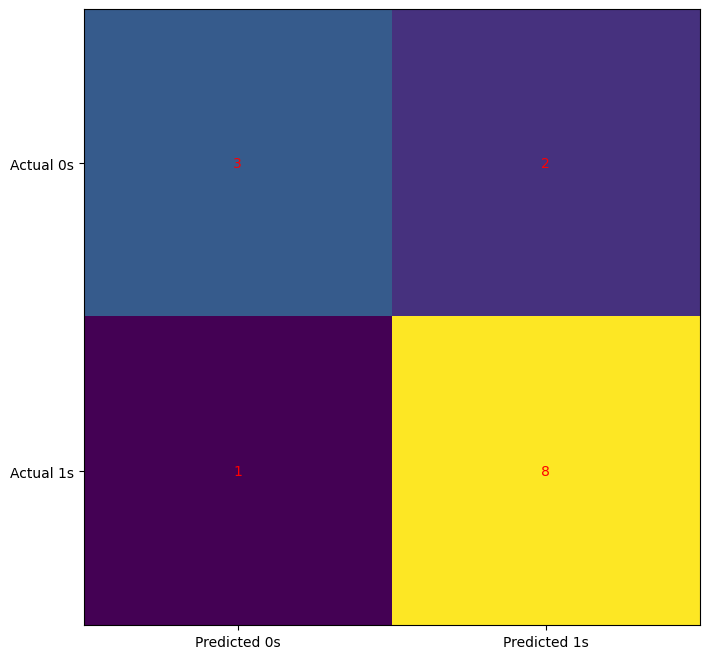

In [28]:
cm = confusion_matrix(y, log_model2.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


####Classification Report

In [29]:
print(classification_report(y, log_model2.predict(x)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14



###Note:</br>Model2 gives 0.79 or 79% Accuracy. Better compared to Model1

*   By using newton-cg solver and multi class as multinomial, we attain better accuracy.
*   In newton-cg solver the inputs are normalized(l2 normalization).



#Choosing Model for predicting new customer

Linear Regression Model--> 0.27</br>
Logistic Regression Model1--> 0.64</br>
**Logistic Regression Model2 --> 0.78**</br>
Wise to choose Logistic Regression Model2 to predict whether the customer buy the product or not.


#Prediction

In [30]:
#Age=25; Income=1500000; Employee=1(yes); Credit_Rating=0(fair) --> 25,1500000,1,0
new_x=[[25,1500000,1,0]]
print(log_model2.predict(new_x))
print(log_model2.predict_proba(new_x))

[1]
[[0.09569818 0.90430182]]


 **1 implies customer would take up the loan.</br>
Model states the probability of that customer to take up loan is 90.45%.**